### Load dataset

In [2]:
import pandas as pd

FILE_PATH = "../Data/patient_genes.csv"
df = pd.read_csv(FILE_PATH)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CACNA2D2  977 non-null    int64 
 1   ESR1      977 non-null    int64 
 2   AGR2      977 non-null    int64 
 3   GATA3     977 non-null    int64 
 4   SLC16A6   977 non-null    int64 
 5   TBC1D9    977 non-null    int64 
 6   INPP4B    977 non-null    int64 
 7   LDHB      977 non-null    int64 
 8   MLPH      977 non-null    int64 
 9   TSPAN1    977 non-null    int64 
 10  STBD1     977 non-null    int64 
 11  STARD3    977 non-null    int64 
 12  RARA      977 non-null    int64 
 13  MCCC2     977 non-null    int64 
 14  PSAT1     977 non-null    int64 
 15  MFGE8     977 non-null    int64 
 16  ANXA9     977 non-null    int64 
 17  PPP1R14C  977 non-null    int64 
 18  SLC44A4   977 non-null    int64 
 19  tnbc      977 non-null    bool  
 20  case_id   977 non-null    object
dtypes: bool(1), int6

# Basic model implementations

### Imports

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from typing import get_args

### Dataset split: training and test data

In [4]:
# Constants
TNBC = "tnbc"
CASE_ID = "case_id"
RANDOM_STATE = 42

# Type annotations
Model = LogisticRegression | SVC | RandomForestClassifier


# Features: all columns except TNBC column
X = df.drop(columns=[TNBC, CASE_ID])
# Target variable
y = df[TNBC]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training size = 0.8 * 977 ≈ 781
# Test size = 0.2 * 977 ≈ 196
print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")


X_train.shape=(781, 19)
X_test.shape=(196, 19)
y_train.shape=(781,)
y_test.shape=(196,)


### Logistic Regression

In [14]:
# Create model
logistic_regression_model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', max_iter=5200)

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Model predictions
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

### Support Vector Machine (SVM)

In [15]:
# Create model
svm_model = SVC(random_state=RANDOM_STATE)

# Train the model
svm_model.fit(X_train, y_train)

# Model predictions
y_pred_svm = svm_model.predict(X_test)

### Random Forest

In [16]:
# Create model
random_forest_model = RandomForestClassifier(random_state=RANDOM_STATE)

#Train the model
random_forest_model.fit(X_train, y_train)

# Model predictions
y_pred_random_forest = random_forest_model.predict(X_test)

## Model Evaluation

In [69]:
classification_report(y_test, y_pred_logistic_regression, output_dict=True, target_names=targetNames)

{'nTNBC': {'precision': 0.9821428571428571,
  'recall': 0.953757225433526,
  'f1-score': 0.967741935483871,
  'support': 173.0},
 'TNBC': {'precision': 0.7142857142857143,
  'recall': 0.8695652173913043,
  'f1-score': 0.7843137254901961,
  'support': 23.0},
 'accuracy': 0.9438775510204082,
 'macro avg': {'precision': 0.8482142857142857,
  'recall': 0.9116612214124151,
  'f1-score': 0.8760278304870335,
  'support': 196.0},
 'weighted avg': {'precision': 0.950710641399417,
  'recall': 0.9438775510204082,
  'f1-score': 0.9462171965560419,
  'support': 196.0}}

### Get Evaluation Data

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

targetNames = ['nTNBC', 'TNBC']

classLG = classification_report(y_test, y_pred_logistic_regression, output_dict=True, target_names=targetNames)
classSVM = classification_report(y_test, y_pred_svm, output_dict=True, target_names=targetNames)
classRF  = classification_report(y_test, y_pred_random_forest , output_dict=True, target_names=targetNames)

confMatrixLG = confusion_matrix(y_test, y_pred_logistic_regression)
confMatrixSVM = confusion_matrix(y_test, y_pred_svm)
confMatrixRF = confusion_matrix(y_test, y_pred_random_forest)

accuracyLG = accuracy_score(y_test, y_pred_logistic_regression);
accuracySVM = accuracy_score(y_test, y_pred_svm);
accuracyRF  = accuracy_score(y_test, y_pred_random_forest);

evalPrecision = 'precision'
evalRecall = 'recall'
evalF1score = 'f1-score'

evalTargetN = 'nTNBC'
evalTarget = 'TNBC'

models = ['Random Forest', 'Support Vector Machine' ,'Logistical Regression']
classLabels = ['Precision', 'Recall', 'F1-score']

notTNBCData = {
    'Random Forest'         : (classRF[evalTargetN][evalPrecision]*100 , classRF[evalTargetN][evalRecall]*100 , classRF[evalTargetN][evalF1score]*100 ),
    'Support Vector'        : (classSVM[evalTargetN][evalPrecision]*100, classSVM[evalTargetN][evalRecall]*100, classSVM[evalTargetN][evalF1score]*100),
    'Logistical Regression' : (classLG[evalTargetN][evalPrecision]*100, classLG[evalTargetN][evalRecall]*100, classLG[evalTargetN][evalF1score]*100)
}
TNBCData = {
    'Random Forest'      : (classRF[evalTarget][evalPrecision]*100 , classRF[evalTarget][evalRecall]*100 , classRF[evalTarget][evalF1score]*100 ),
    'Support Vector'     : (classSVM[evalTarget][evalPrecision]*100, classSVM[evalTarget][evalRecall]*100, classSVM[evalTarget][evalF1score]*100),
    'Logistical Regression' : (classLG[evalTarget][evalPrecision]*100, classLG[evalTarget][evalRecall]*100, classLG[evalTarget][evalF1score]*100),
}
accuracyData = {
    'Random Forest' : (accuracyRF*100),
    'Support Vector' : (accuracySVM*100),
    'Logistical Regression' : (accuracyLG*100)
}

### Plot the data to charts

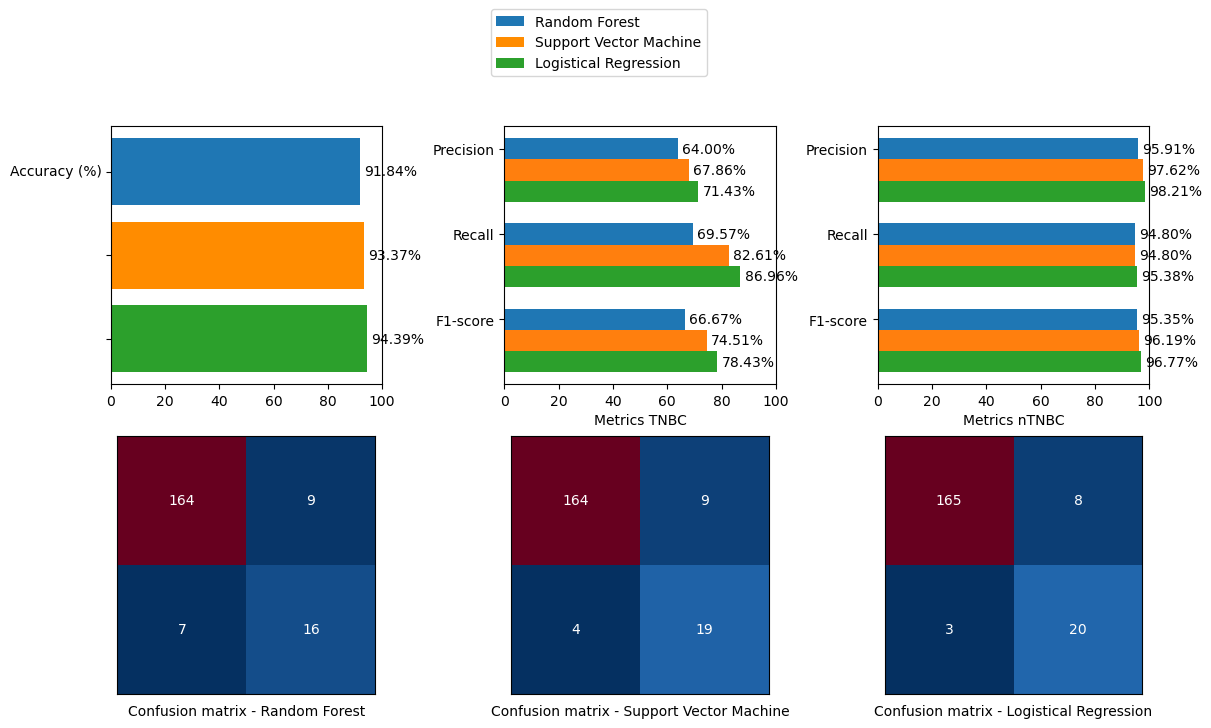

In [59]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows = 2, ncols = 3, layout='constrained', figsize=[12,6])

# == Accuracy
ax[0,0].set_xlim(0,100)

rects = ax[0,0].barh(y=accuracyData.keys(), width=accuracyData.values(), color=['#1F77B4', 'darkorange', '#2CA02C'])
ax[0,0].bar_label(rects, padding=3, fmt='%.2f%%')
ax[0,0].set_ylabel('Accuracy (%)', rotation=0, horizontalalignment='left')
ax[0,0].yaxis.set_label_coords(-0.37, 0.8)
ax[0,0].set_yticklabels('')
ax[0,0].invert_yaxis()

# == TNBC
width = 0.25
multiplier = 0
ax[0,1].set_xlim(0, 100)
y_pos = np.arange(len(models))
for attribute, measurement in TNBCData.items():
    offset = width * multiplier
    rectsTNBC = ax[0,1].barh(y_pos + offset, measurement, width, label=attribute)
    ax[0,1].bar_label(rectsTNBC, padding=3, fmt='%.2f%%')
    multiplier += 1

ax[0,1].set_yticks(y_pos)
ax[0,1].set_yticklabels(classLabels)
ax[0,1].invert_yaxis()
ax[0,1].set_xlabel('Metrics TNBC')

# == tNBC
multiplier = 0
ax[0,2].set_xlim(0, 100)
y_pos = np.arange(len(models))
for attribute, measurement in notTNBCData.items():
    offset = width * multiplier  
    rectsNTNBC = ax[0,2].barh(y_pos + offset, measurement, width, label=attribute)
    ax[0,2].bar_label(rectsNTNBC, padding=3, fmt='%.2f%%')
    multiplier += 1

ax[0,2].set_yticks(y_pos)
ax[0,2].set_yticklabels(classLabels)
ax[0,2].invert_yaxis()
ax[0,2].set_xlabel('Metrics nTNBC')

# == Three confusion matrices
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
ax[1,0].imshow(confMatrixRF, cmap='RdBu_r')
for i in range(2):
    for j in range(2):
        text = ax[1,0].text(j, i, confMatrixRF[i, j],
                       ha="center", va="center", color="white")

ax[1,0].yaxis.set_visible(False)
ax[1,0].set_xticklabels('')
ax[1,0].set_xlabel('Confusion matrix - Random Forest')
ax[1,0].tick_params(axis=u'both', which=u'both',length=0)

ax[1,1].imshow(confMatrixSVM, cmap='RdBu_r')
for i in range(2):
    for j in range(2):
        if confMatrixSVM[i, j] > 44 and confMatrixSVM[i, j] < 60:
            text = ax[1,1].text(j, i, confMatrixSVM[i, j],
                           ha="center", va="center", color="black")
        else:
            text = ax[1,1].text(j, i, confMatrixSVM[i, j],
                           ha="center", va="center", color="white")
            
ax[1,1].yaxis.set_visible(False)
ax[1,1].set_xticklabels('')
ax[1,1].set_xlabel('Confusion matrix - Support Vector Machine')
ax[1,1].tick_params(axis=u'both', which=u'both',length=0)

ax[1,2].imshow(confMatrixLG, cmap='RdBu_r')
for i in range(2):
    for j in range(2):
        text = ax[1,2].text(j, i, confMatrixLG[i, j],
                       ha="center", va="center", color="white")

ax[1,2].yaxis.set_visible(False)
ax[1,2].set_xticklabels('')
ax[1,2].set_xlabel('Confusion matrix - Logistical Regression')
ax[1,2].tick_params(axis=u'both', which=u'both',length=0)

fig.legend(handles=rects, labels=models, bbox_to_anchor=(0.09, 0.7, 0.5, 0.5))

chartsPartOne = plt.gcf()

plt.show()

### Plot the ROC Curve and Compute AUC Score

#### Get the ROC and AUC data

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

## Computing ROC curve [ISBN 978-14-49-36988-0]
y_probsRF = random_forest_model.predict_proba(X_test)[:, 1]
y_probsSVM = svm_model.decision_function(X_test)
y_probsLG = logistic_regression_model.predict_proba(X_test)[:, 1]

fprRF, tprRF, thresholdsRF = roc_curve(y_test, y_probsRF)
fprSVM, tprSVM, thresholdsSVM = roc_curve(y_test, y_probsSVM)
fprLG, tprLG, thresholdsLG = roc_curve(y_test, y_probsLG)

rocAucRF = auc(fprRF, tprRF)
rocAucSVM = auc(fprSVM, tprSVM)
rocAucLG = auc(fprLG, tprLG)

rocAucData = {
    'Random Forest'          : rocAucRF*100,
    'Support Vector Machine' : rocAucSVM*100,
    'Logistical Regression'  : rocAucLG*100
}

#### Plot the data to charts

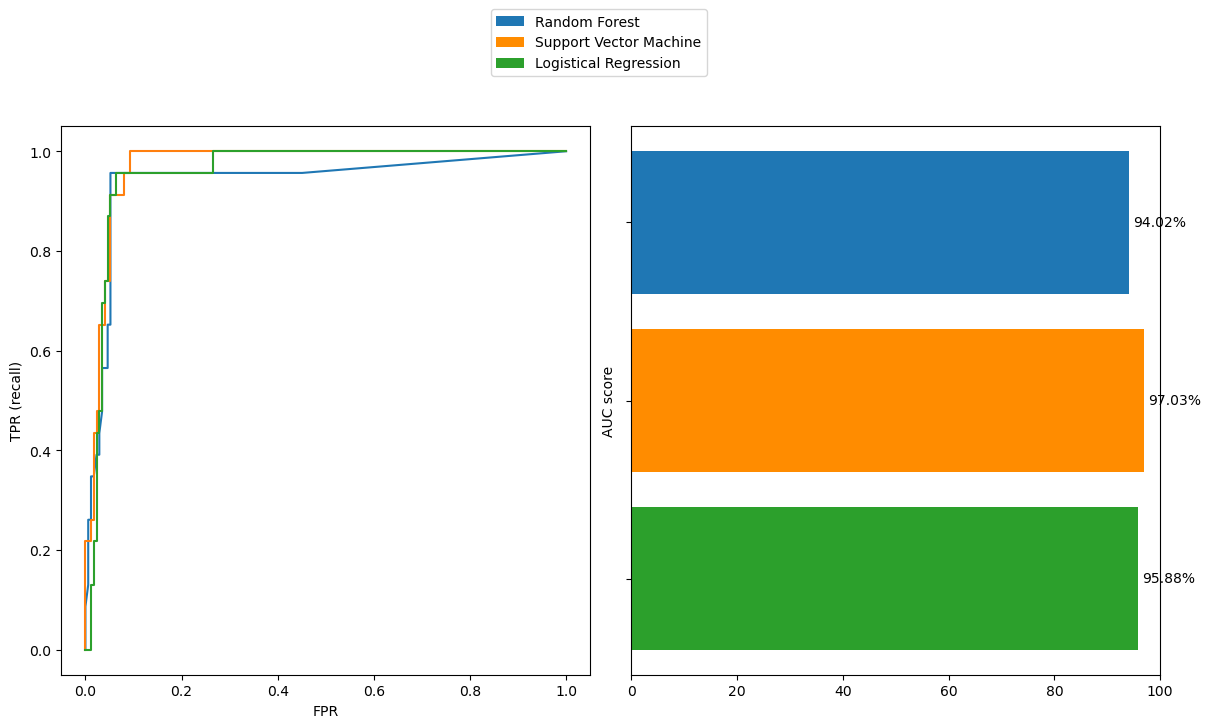

In [61]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, layout='constrained', figsize=[12,6])

## Computing ROC curve [978-14-49-36988-0]
ax[0].plot(fprRF, tprRF, label='Random Forest')
ax[0].plot(fprSVM, tprSVM, label='Support Vector Machine')
ax[0].plot(fprLG, tprLG, label='Logistical Regression')
ax[0].set_xlabel('FPR')
ax[0].set_ylabel('TPR (recall)')

rects = ax[1].barh(y=rocAucData.keys(), width=rocAucData.values(), color=['#1F77B4', 'darkorange', '#2CA02C'])
ax[1].set_xlim(0, 100)
ax[1].bar_label(rects, padding=3, fmt='%.2f%%')
ax[1].set_ylabel('AUC score')
ax[1].set_yticklabels('')
ax[1].invert_yaxis()

fig.legend(handles=rects, labels=models, bbox_to_anchor=(0.09, 0.7, 0.5, 0.5))

chartsPartTwo = plt.gcf()

plt.show()

### Cross Model Validation

#### Get 5-Fold Cross Validation data

In [66]:
from sklearn.model_selection import cross_val_score

cs_scores_LG  = cross_val_score(logistic_regression_model, X, y, cv=5, scoring='accuracy')
cs_scores_SVM = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
cs_scores_RF  = cross_val_score(random_forest_model, X, y, cv=5, scoring='accuracy')

fold5Data = {
    'Random Forest'          : cs_scores_RF.mean()*100,
    'Support Vector Machine' : cs_scores_SVM.mean()*100,
    'Logistical Regression'  : cs_scores_LG.mean()*100
}

#### Plot data to charts

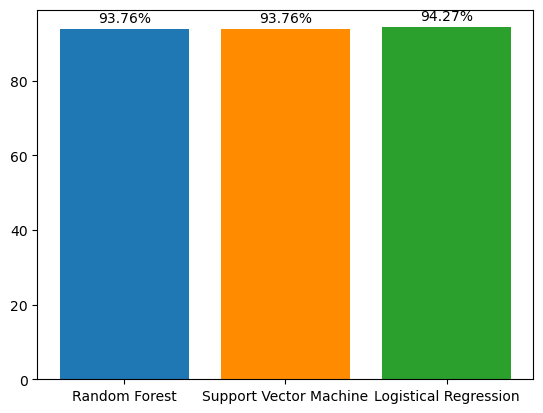

In [67]:
fig, ax = plt.subplots()

rects = ax.bar(fold5Data.keys(), fold5Data.values(), label=fold5Data.keys(), color=['#1F77B4', 'darkorange', '#2CA02C'])
ax.bar_label(rects, padding=3, fmt='%.2f%%')

plt.show()
